In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('saved_model/09_13_model')

In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 36, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 110592)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [12]:
def func(path):
    np_img = np.array(Image.open(path))
#     print(np_img.shape)
    img = (np.expand_dims(tf.image.resize(np_img, [200, 150]), 0))
    prediction_result = ''
#     print(img.shape)
    predictions_single = model.predict(img)
    if predictions_single[0][0] == 0.0:
        prediction_result = "indoor"
    else:
        prediction_result = "outdoor"
    return prediction_result
#     plt.figure()
#     plt.imshow(np_img)
# #     plt.colorbar()
#     plt.grid(False)
#     plt.xlabel(prediction_result)
#     plt.show()

In [ ]:
import os

In [93]:
indoor_prediction_label = []

In [94]:
outdoor_prediction_label = []

In [95]:
list_indoor_path = os.listdir('./test/indoor/')

In [96]:
list_outdoor_path = os.listdir('./test/outdoor/')

In [97]:
count = 0
for path in list_indoor_path:
    result = func('./test/indoor/' + path)
    indoor_prediction_label.append(result)
    if result == 'indoor':
        count+=1
        
print(count/len(list_indoor_path))

0.8


In [98]:
count = 0
for path in list_outdoor_path:
    result = func('./test/outdoor/' + path)
    outdoor_prediction_label.append(result)
    if result == 'outdoor':
        count+=1
        
print(count/len(list_outdoor_path))

0.8285714285714286


In [70]:
outdoor_prediction_label

['outdoor',
 'indoor',
 'outdoor',
 'indoor',
 'outdoor',
 'indoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'indoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'indoor',
 'outdoor',
 'outdoor',
 'indoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor',
 'outdoor']

In [111]:
list_tmp = os.listdir('./test/mix/')

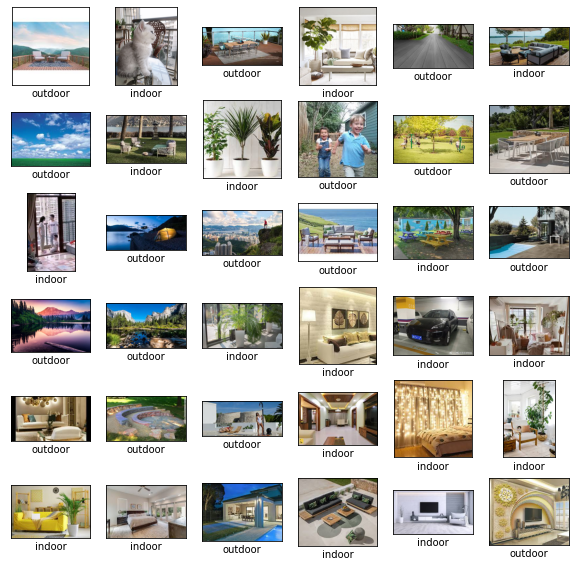

In [112]:
plt.figure(figsize=(10,10))
for i in range(0, 36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(Image.open('./test/mix/' + list_tmp[i])))
    plt.xlabel(func('./test/mix/' + list_tmp[i]))
plt.show()

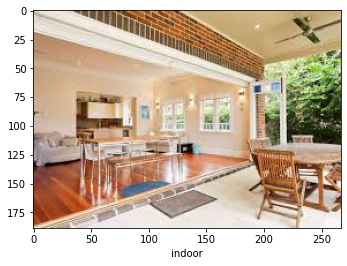

In [5]:
func('./test/mix/images-15.jpg')

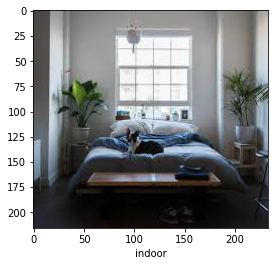

In [6]:
func('./test/mix/images-22.jpg')

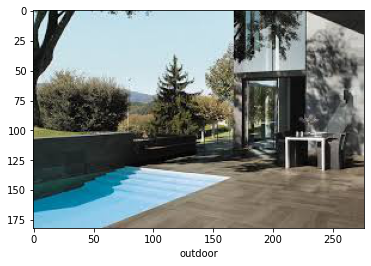

In [7]:
func('./test/mix/images-33.jpg')

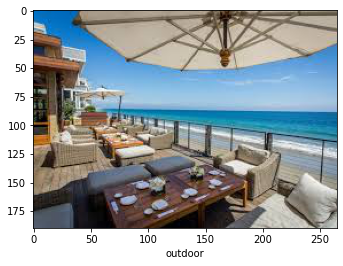

In [8]:
func('./test/mix/images-38.jpg')